<a href="https://colab.research.google.com/github/CARLO-IITI/Warehouse-Management/blob/main/KNN_try.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generate the mock inventory data : first defining categories of items and then defining data set for items with weight and dimensions

In [ ]:
import random
import pandas as pd


# Define categories and items
categories = {
    "Grocery": ["Rice", "Wheat", "Oil", "Sugar", "Salt", "Cereal", "Pasta"],
    "Chemical": ["Detergent", "Bleach", "Acid", "Alkali"],
    "Inflammable": ["Gasoline", "Alcohol", "Paint"],
    "Electronics": ["Laptop", "Mobile", "Camera", "Headphones"],
    "Furniture": ["Table", "Chair", "Couch", "Bed"],
    "Clothing": ["Shirt", "Pants", "Jacket", "Shoes"],
    "Stationery": ["Pens", "Notebooks", "Markers", "Staplers"],
    "Books": ["Fiction", "Non-fiction", "Academic", "Comics"],
    "Pharmacy": ["Vitamins", "Painkillers", "Prescription Medicine"],
    "Toys": ["Board Games", "Dolls", "Puzzles", "Action Figures"],
    "Pet Supplies": ["Pet Food", "Pet Toys", "Pet Beds", "Pet Care Products"],
    "Sports Goods": ["Football", "Basketball", "Tennis Rackets", "Golf Clubs"],
    "Kitchenware": ["Pots", "Pans", "Cutlery", "Plates"],
    "Cosmetics": ["Lipstick", "Foundation", "Mascara", "Eyeliner"],
    "Hardware": ["Screws", "Nails", "Drills", "Hammers"],
    "Garden Supplies": ["Seeds", "Fertilizer", "Gardening Tools", "Plant Pots"],
    "Automotive": ["Car Oil", "Wipers", "Tires", "Batteries"]
}

# Dataset of items with their dimensions (weight, height, width, depth)
items_data = {
    "Rice": [1.0, 30, 20, 10],
    "Wheat": [1.0, 30, 20, 10],
    "Oil": [0.5, 10, 5, 5],
    "Sugar": [1.0, 30, 20, 10],
    "Salt": [1.0, 30, 20, 10],
    "Cereal": [0.5, 25, 15, 5],
    "Pasta": [0.5, 25, 15, 5],
    "Detergent": [0.8, 30, 20, 10],
    "Bleach": [1.0, 30, 20, 10],
    "Acid": [0.5, 10, 5, 5],
    "Alkali": [0.5, 10, 5, 5],
    "Gasoline": [2.0, 40, 30, 20],
    "Alcohol": [1.0, 30, 20, 10],
    "Paint": [1.5, 35, 25, 15],
    "Laptop": [1.5, 40, 30, 5],
    "Mobile": [0.2, 15, 10, 2],
    "Camera": [0.3, 20, 15, 10],
    "Headphones": [0.5, 20, 20, 10],
    "Table": [20.0, 100, 60, 50],
    "Chair": [5.0, 50, 50, 50],
    "Couch": [50.0, 200, 90, 90],
    "Bed": [30.0, 200, 150, 50],
    "Shirt": [0.3, 30, 20, 2],
    "Pants": [0.5, 40, 30, 2],
    "Jacket": [1.0, 50, 40, 5],
    "Shoes": [1.0, 30, 20, 10],
    "Pens": [0.1, 10, 2, 2],
    "Notebooks": [0.5, 30, 20, 2],
    "Markers": [0.2, 15, 3, 3],
    "Staplers": [0.3, 15, 5, 5],
    "Fiction": [0.5, 25, 15, 5],
    "Non-fiction": [0.6, 30, 20, 6],
    "Academic": [1.0, 40, 25, 8],
    "Comics": [0.4, 25, 15, 4],
    "Vitamins": [0.1, 10, 5, 5],
    "Painkillers": [0.1, 10, 5, 5],
    "Prescription Medicine": [0.2, 15, 10, 5],
    "Board Games": [1.0, 40, 30, 10],
    "Dolls": [0.5, 30, 20, 10],
    "Puzzles": [0.3, 20, 15, 5],
    "Action Figures": [0.4, 25, 15, 10],
    "Pet Food": [2.0, 40, 30, 20],
    "Pet Toys": [0.5, 20, 15, 10],
    "Pet Beds": [3.0, 60, 50, 20],
    "Pet Care Products": [0.5, 25, 15, 10],
    "Football": [0.6, 22, 22, 22],
    "Basketball": [0.6, 24, 24, 24],
    "Tennis Rackets": [0.3, 70, 30, 5],
    "Golf Clubs": [1.5, 100, 15, 15],
    "Pots": [1.0, 30, 20, 10],
    "Pans": [1.0, 30, 20, 10],
    "Cutlery": [0.5, 15, 10, 5],
    "Plates": [0.8, 20, 20, 5],
    "Lipstick": [0.05, 10, 2, 2],
    "Foundation": [0.1, 10, 5, 5],
    "Mascara": [0.05, 10, 2, 2],
    "Eyeliner": [0.05, 10, 2, 2],
    "Screws": [0.1, 10, 5, 5],
    "Nails": [0.1, 10, 5, 5],
    "Drills": [2.0, 30, 20, 10],
    "Hammers": [1.5, 25, 10, 5],
    "Seeds": [0.5, 15, 10, 5],
    "Fertilizer": [2.0, 30, 20, 10],
    "Gardening Tools": [1.0, 50, 20, 10],
    "Plant Pots": [0.5, 30, 20, 20],
    "Car Oil": [5.0, 40, 30, 20],
    "Wipers": [0.5, 70, 10, 5],
    "Tires": [10.0, 70, 70, 20],
    "Batteries": [2.0, 30, 20, 10]
}

# Generate mock data for items
num_items = 100000
items = []

# Define realistic distributions for sizes (cubic meters) and weights (kg)
size_distribution = {
    "Grocery": (0.01, 0.1),
    "Chemical": (0.05, 0.5),
    "Inflammable": (0.1, 1.0),
    "Electronics": (0.02, 0.5),
    "Furniture": (0.5, 5.0),
    "Clothing": (0.01, 0.2),
    "Stationery": (0.01, 0.1),
    "Books": (0.01, 0.2),
    "Pharmacy": (0.01, 0.1),
    "Toys": (0.01, 0.5),
    "Pet Supplies": (0.1, 1.0),
    "Sports Goods": (0.1, 2.0),
    "Kitchenware": (0.01, 0.5),
    "Cosmetics": (0.01, 0.1),
    "Hardware": (0.01, 1.0),
    "Garden Supplies": (0.01, 2.0),
    "Automotive": (0.1, 5.0)
}

weight_distribution = {
    "Grocery": (0.1, 5),
    "Chemical": (0.5, 10),
    "Inflammable": (0.5, 20),
    "Electronics": (0.2, 3),
    "Furniture": (5, 50),
    "Clothing": (0.1, 2),
    "Stationery": (0.01, 0.5),
    "Books": (0.1, 1.0),
    "Pharmacy": (0.01, 0.5),
    "Toys": (0.1, 2.0),
    "Pet Supplies": (0.5, 5.0),
    "Sports Goods": (0.2, 5.0),
    "Kitchenware": (0.1, 3.0),
    "Cosmetics": (0.01, 0.5),
    "Hardware": (0.1, 5.0),
    "Garden Supplies": (0.1, 5.0),
    "Automotive": (0.5, 10.0)
}


#randomly assigining the items from the defined values above so that
# a database can be created

for _ in range(num_items):
    category = random.choice(list(categories.keys()))
    item_name = random.choice(categories[category])
    size = round(random.uniform(*size_distribution[category]), 2)
    weight = round(random.uniform(*weight_distribution[category]), 2)
    tags = [category]

    # Retrieve dimensions from items_data
    dimensions = items_data[item_name]
    height, width, depth = dimensions[1], dimensions[2], dimensions[3]



    items.append({
        "ItemName": item_name,
        "Category": category,
        "Size(m^3)": size,
        "Weight(kg)": weight,
        "Height(cm)": height,
        "Width(cm)": width,
        "Depth(cm)": depth,
        "Tags": ", ".join(tags),

    })

# Create DataFrame and save to CSV
df = pd.DataFrame(items)
df.to_csv("mock_inventory_data_with_dimensions.csv", index=False)

print("Mock data with dimensions generated and saved to 'mock_inventory_data_with_dimensions.csv'")


Mock data with dimensions generated and saved to 'mock_inventory_data_with_dimensions.csv'


Generate the Transaction Data

In [ ]:
import random
import pandas as pd
import numpy as np


# Define categories and items
categories = {
    "Grocery": ["Rice", "Wheat", "Oil", "Sugar", "Salt", "Cereal", "Pasta"],
    "Chemical": ["Detergent", "Bleach", "Acid", "Alkali"],
    "Inflammable": ["Gasoline", "Alcohol", "Paint"],
    "Electronics": ["Laptop", "Mobile", "Camera", "Headphones"],
    "Furniture": ["Table", "Chair", "Couch", "Bed"],
    "Clothing": ["Shirt", "Pants", "Jacket", "Shoes"],
    "Stationery": ["Pens", "Notebooks", "Markers", "Staplers"],
    "Books": ["Fiction", "Non-fiction", "Academic", "Comics"],
    "Pharmacy": ["Vitamins", "Painkillers", "Prescription Medicine"],
    "Toys": ["Board Games", "Dolls", "Puzzles", "Action Figures"],
    "Pet Supplies": ["Pet Food", "Pet Toys", "Pet Beds", "Pet Care Products"],
    "Sports Goods": ["Football", "Basketball", "Tennis Rackets", "Golf Clubs"],
    "Kitchenware": ["Pots", "Pans", "Cutlery", "Plates"],
    "Cosmetics": ["Lipstick", "Foundation", "Mascara", "Eyeliner"],
    "Hardware": ["Screws", "Nails", "Drills", "Hammers"],
    "Garden Supplies": ["Seeds", "Fertilizer", "Gardening Tools", "Plant Pots"],
    "Automotive": ["Car Oil", "Wipers", "Tires", "Batteries"]
}

# Generate mock data for transactions
num_transactions = 10000
max_items_per_transaction = 10

transactions = []


for _ in range(num_transactions):
    transaction = []
    num_items = random.randint(1, max_items_per_transaction)

    for _ in range(num_items):
        category = random.choice(list(categories.keys()))
        item_name = random.choice(categories[category])
        transaction.append(item_name)

    transactions.append(transaction)

# Create a DataFrame where each row is a transaction
transaction_df = pd.DataFrame(transactions)

# Save the DataFrame to a CSV file
transaction_df.to_csv("mock_transaction_data.csv", index=False, header=False)

print("Mock transaction data generated and saved to 'mock_transaction_data.csv'")


Mock transaction data generated and saved to 'mock_transaction_data.csv'


In [ ]:
pip install --upgrade ipykernel

To determine which items are bought frequently using the FP-Growth algorithm, we can look at the **frequent_itemsets_fp** DataFrame generated by the fpgrowth function. The **support column** in this DataFrame indicates the frequency of each itemset in the dataset. **Higher support values mean that the item or itemset appears more frequently in the transactions.**

FP growth Algorithim for generating the support values

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, association_rules

# Load the dataset
dataset = pd.read_csv('/content/mock_transaction_data.csv', header=None)

# Transform the dataset
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_array, columns=te.columns_)

# Display the transformed dataset
print(df.head())

   Academic   Acid  Action Figures  Alcohol  Alkali  Basketball  Batteries  \
0     False  False           False    False   False       False      False   
1     False  False           False    False   False       False      False   
2     False  False           False    False   False        True      False   
3     False  False           False    False   False       False      False   
4     False  False            True    False   False       False      False   

     Bed  Bleach  Board Games  ...  Shirt  Shoes  Staplers  Sugar  Table  \
0  False   False        False  ...  False  False     False  False  False   
1  False   False        False  ...  False   True     False  False  False   
2  False   False         True  ...  False  False     False  False  False   
3  False   False        False  ...  False  False     False  False  False   
4   True   False        False  ...  False  False     False  False  False   

   Tennis Rackets  Tires  Vitamins  Wheat  Wipers  
0           False  Fal

In [ ]:
import random
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, association_rules



# Define categories and items
categories = {
    "Grocery": ["Rice", "Wheat", "Oil", "Sugar", "Salt", "Cereal", "Pasta"],
    "Chemical": ["Detergent", "Bleach", "Acid", "Alkali"],
    "Inflammable": ["Gasoline", "Alcohol", "Paint"],
    "Electronics": ["Laptop", "Mobile", "Camera", "Headphones"],
    "Furniture": ["Table", "Chair", "Couch", "Bed"],
    "Clothing": ["Shirt", "Pants", "Jacket", "Shoes"],
    "Stationery": ["Pens", "Notebooks", "Markers", "Staplers"],
    "Books": ["Fiction", "Non-fiction", "Academic", "Comics"],
    "Pharmacy": ["Vitamins", "Painkillers", "Prescription Medicine"],
    "Toys": ["Board Games", "Dolls", "Puzzles", "Action Figures"],
    "Pet Supplies": ["Pet Food", "Pet Toys", "Pet Beds", "Pet Care Products"],
    "Sports Goods": ["Football", "Basketball", "Tennis Rackets", "Golf Clubs"],
    "Kitchenware": ["Pots", "Pans", "Cutlery", "Plates"],
    "Cosmetics": ["Lipstick", "Foundation", "Mascara", "Eyeliner"],
    "Hardware": ["Screws", "Nails", "Drills", "Hammers"],
    "Garden Supplies": ["Seeds", "Fertilizer", "Gardening Tools", "Plant Pots"],
    "Automotive": ["Car Oil", "Wipers", "Tires", "Batteries"]
}

# Define item purchase probabilities (higher means more likely to be bought together)
item_probabilities = {
    "Grocery": 0.5,
    "Chemical": 0.1,
    "Inflammable": 0.05,
    "Electronics": 0.2,
    "Furniture": 0.05,
    "Clothing": 0.1,
    "Stationery": 0.1,
    "Books": 0.1,
    "Pharmacy": 0.1,
    "Toys": 0.1,
    "Pet Supplies": 0.05,
    "Sports Goods": 0.1,
    "Kitchenware": 0.1,
    "Cosmetics": 0.05,
    "Hardware": 0.05,
    "Garden Supplies": 0.05,
    "Automotive": 0.05
}

# Generate mock data for transactions
num_transactions = 10000
max_items_per_transaction = 10

transactions = []

for _ in range(num_transactions):
    transaction = []
    num_items = random.randint(1, max_items_per_transaction)
    selected_categories = random.choices(list(categories.keys()), weights=item_probabilities.values(), k=num_items)

    for category in selected_categories:
        item_name = random.choice(categories[category])
        transaction.append(item_name)

    transactions.append(transaction)

# Create a DataFrame where each row is a transaction
transaction_df = pd.DataFrame(transactions)

# Save the DataFrame to a CSV file
transaction_df.to_csv("mock_transaction_data.csv", index=False, header=False)

print("Mock transaction data generated and saved to 'mock_transaction_data.csv'")

# Transform the dataset
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_array, columns=te.columns_)

# Display the transformed dataset
print("Transformed Dataset:")
print(df.head())

# Generate frequent itemsets using FP-Growth
min_support_value = 0.005  # Adjusted min_support for more frequent itemsets
frequent_itemsets_fp = fpgrowth(df, min_support=min_support_value, use_colnames=True)

# Check if frequent itemsets are generated
if frequent_itemsets_fp.empty:
    print("No frequent itemsets found.")
else:
    print("Frequent Itemsets:")
    print(frequent_itemsets_fp.head())

# Generate association rules
min_confidence_value = 0.2  # Adjusted min_threshold for confidence
if not frequent_itemsets_fp.empty:
    rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=min_confidence_value)
    if rules_fp.empty:
        print("No association rules generated.")
    else:
        print("Association Rules:")
        print(rules_fp.head())
else:
    print("No association rules generated.")

# Sort frequent itemsets by support in descending order
sorted_frequent_itemsets = frequent_itemsets_fp.sort_values(by='support', ascending=False)

# Extract and display individual item frequencies
item_support = sorted_frequent_itemsets[sorted_frequent_itemsets['itemsets'].apply(lambda x: len(x) == 1)]

print("\nIndividual Item Frequencies:")
print(item_support)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mock transaction data generated and saved to 'mock_transaction_data.csv'
Transformed Dataset:
   Academic   Acid  Action Figures  Alcohol  Alkali  Basketball  Batteries  \
0     False  False           False    False   False       False      False   
1     False  False           False    False   False       False      False   
2     False  False           False    False   False       False      False   
3     False  False           False    False   False       False      False   
4     False   True           False    False   False       False      False   

     Bed  Bleach  Board Games  ...  Shirt  Shoes  Staplers  Sugar  Table  \
0  False   False         True  ...  False  False     False  False  False   
1  False   False        False  ...  False  False     False  False  False   
2  False   False        False  ...  False  False     False  False  False   
3  False   False        False  ...  False  False     False  False  False   
4  False   False        False  ...  False  False     Fals

 Identify Fast-Moving Items and Place Them Closer to Picking Areas
This step identifies fast-moving items based on support values and places them closer to picking areas. **bold text**

In [ ]:
# Sort frequent itemsets by support in descending order
sorted_frequent_itemsets = frequent_itemsets_fp.sort_values(by='support', ascending=False)

# Extract and display individual item frequencies
item_support = sorted_frequent_itemsets[sorted_frequent_itemsets['itemsets'].apply(lambda x: len(x) == 1)]

print("\n Group Item Frequencies:")
print(sorted_frequent_itemsets)
print("\nIndividual Item Frequencies:")
print(item_support)




 Group Item Frequencies:
     support                 itemsets
10    0.1921                   (Salt)
0     0.1912                 (Cereal)
6     0.1898                    (Oil)
35    0.1886                  (Sugar)
17    0.1876                  (Pasta)
..       ...                      ...
801   0.0050        (Academic, Shirt)
296   0.0050   (Cutlery, Non-fiction)
409   0.0050       (Acid, Golf Clubs)
86    0.0050   (Camera, Rice, Cereal)
89    0.0050  (Camera, Cereal, Pasta)

[1282 rows x 2 columns]

Individual Item Frequencies:
    support     itemsets
10   0.1921       (Salt)
0    0.1912     (Cereal)
6    0.1898        (Oil)
35   0.1886      (Sugar)
17   0.1876      (Pasta)
..      ...          ...
39   0.0349     (Drills)
64   0.0346      (Chair)
63   0.0336     (Screws)
56   0.0331        (Bed)
34   0.0317  (Batteries)

[69 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Arrange Fast Moving Items Using a Heap

Defining warehouse structure: each zone is catagorised in racks and racks are divided in slots with maximum weight and dimensions

Generating a WareHouse

In [ ]:
import random

def generate_warehouse(num_zones):
  warehouse = {"zones": {}}
  for zone_num in range(1, num_zones + 1):
    zone_name = f"Zone {zone_num}"
    warehouse["zones"][zone_name] = {
      "racks": []
    }
    for rack_num in range(1, random.randint(2, 4) + 1):  # Random number of racks per zone
      rack_name = f"Rack {rack_num}"
      warehouse["zones"][zone_name]["racks"].append({
        "rack_id": rack_name,
        "slots": []
      })
      for slot_num in range(1, random.randint(2, 3) + 1):  # Random number of slots per rack
        slot_name = f"Slot {slot_num}"
        warehouse["zones"][zone_name]["racks"][-1]["slots"].append({
          "slot_id": slot_name,
          "max_weight": random.randint(300, 3000),  # Random max weight
          "dimensions": [
            random.randint(30, 80),  # Random dimensions
            random.randint(30, 80),
            random.randint(30, 80)
          ]
        })
      # Randomly assign near_picking_zone, near_packing_machine, and near_outbound_gate
      warehouse["zones"][zone_name]["racks"][-1]["near_picking_zone"] = random.choice([True, False])
      warehouse["zones"][zone_name]["racks"][-1]["near_packing_machine"] = random.choice([True, False])
      warehouse["zones"][zone_name]["racks"][-1]["near_outbound_gate"] = random.choice([True, False])
  return warehouse

# Generate a warehouse with 20 zones
warehouse = generate_warehouse(20)

# Print the expanded warehouse (for verification)
import json
print(json.dumps(warehouse, indent=2))


{
  "zones": {
    "Zone 1": {
      "racks": [
        {
          "rack_id": "Rack 1",
          "slots": [
            {
              "slot_id": "Slot 1",
              "max_weight": 813,
              "dimensions": [
                80,
                52,
                75
              ]
            },
            {
              "slot_id": "Slot 2",
              "max_weight": 2872,
              "dimensions": [
                39,
                64,
                31
              ]
            }
          ],
          "near_picking_zone": true,
          "near_packing_machine": false,
          "near_outbound_gate": true
        },
        {
          "rack_id": "Rack 2",
          "slots": [
            {
              "slot_id": "Slot 1",
              "max_weight": 2555,
              "dimensions": [
                31,
                59,
                33
              ]
            },
            {
              "slot_id": "Slot 2",
              "max_weight": 1861,

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)




`Tasks Left`
1.   Load the inventory data.  
2.   Applies the KNN algorithm to find the best fit for items in a rack.
3.   Uses the knapsack algorithm to ensure items fit within rack constraints.
4.   Saves the final assignment of items to racks in a new CSV file.






In [ ]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Load the mock inventory data
df = pd.read_csv("mock_inventory_data_with_dimensions.csv")


# Function to find nearest slot based on item dimensions
def find_nearest_slot(item, slots):
    nbrs = NearestNeighbors(n_neighbors=1, algorithm='ball_tree').fit(slots)
    distances, indices = nbrs.kneighbors([item])
    return indices[0][0]

# Function to check if adding item exceeds rack weight limit
def can_add_to_rack(current_weight, item_weight, max_weight):
    return current_weight + item_weight <= max_weight

# Function to assign items to racks and slots using knapsack algorithm
def assign_items_to_slots(items, warehouse):
    assigned_slots = []
    priority_items = set(item_support['itemsets'].apply(lambda x: list(x)[0]))

    for zone, data in warehouse['zones'].items():
        for rack in data['racks']:
            current_weight = 0
            for _, item in items.iterrows():
                item_name = item['ItemName']
                item_dimensions = [item['Height(cm)'], item['Width(cm)'], item['Depth(cm)']]
                item_weight = item['Weight(kg)']
                item_category = item['Category']

                # Determine if the item is a priority item
                is_priority = item_name in priority_items

                # Find suitable slots in the current rack
                suitable_slots = []
                for slot in rack['slots']:
                    if item_weight <= slot['max_weight'] and all([item_dimensions[i] <= slot['dimensions'][i] for i in range(3)]):
                        suitable_slots.append((zone, rack['rack_id'], slot['slot_id'], slot['dimensions'], slot['max_weight'], rack['near_picking_zone'], rack['near_packing_machine'], rack['near_outbound_gate']))

                # Find the nearest slot based on dimensions
                if suitable_slots:
                    slot_dimensions = [s[3] for s in suitable_slots]
                    nearest_slot_index = find_nearest_slot(item_dimensions, slot_dimensions)

                    # Check if adding the item exceeds the rack's weight limit
                    if can_add_to_rack(current_weight, item_weight, suitable_slots[nearest_slot_index][4]):
                        assigned_slots.append((item_name, suitable_slots[nearest_slot_index]))
                        current_weight += item_weight

    return assigned_slots

# Assign items to slots
assigned_slots = assign_items_to_slots(df, warehouse)

# Save assigned slots to CSV
assigned_slots_df = pd.DataFrame(assigned_slots, columns=['ItemName', 'Assigned Slot'])
assigned_slots_df[['Zone', 'Rack', 'Slot', 'Slot Dimensions', 'Max Weight', 'Near Picking Zone', 'Near Packing Machine', 'Near Outbound Gate']] = pd.DataFrame(assigned_slots_df['Assigned Slot'].tolist(), index=assigned_slots_df.index)
assigned_slots_df.drop(columns=['Assigned Slot'], inplace=True)
assigned_slots_df.to_csv('assigned_slots.csv', index=False)

print("Assigned slots saved to 'assigned_slots.csv'.")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Assigned slots saved to 'assigned_slots.csv'.


In [ ]:
!git init


hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Added the function to check for priority items

In [ ]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Load the mock inventory data
df = pd.read_csv("mock_inventory_data_with_dimensions.csv")

# Assuming 'item_support' is defined earlier and contains the priority items identified using the FP Growth algorithm
priority_items = set(item_support['itemsets'].apply(lambda x: list(x)[0]))

# Function to find nearest slot based on item dimensions
def find_nearest_slot(item, slots):
    nbrs = NearestNeighbors(n_neighbors=1, algorithm='ball_tree').fit(slots)
    distances, indices = nbrs.kneighbors([item])
    return indices[0][0]

# Function to check if adding item exceeds rack weight limit
def can_add_to_rack(current_weight, item_weight, max_weight):
    return current_weight + item_weight <= max_weight

# Function to assign items to racks and slots using knapsack algorithm
def assign_items_to_slots(items, warehouse):
    assigned_slots = []
    remaining_items = []

    for zone, data in warehouse['zones'].items():
        for rack in data['racks']:
            current_weight = 0

            # Separate items into priority and non-priority
            priority_items = items[items['ItemName'].isin(priority_items)]
            non_priority_items = items[~items['ItemName'].isin(priority_items)]

            # Helper function to allocate items to slots
            def allocate_items(item_list):
                nonlocal current_weight
                for _, item in item_list.iterrows():
                    item_name = item['ItemName']
                    item_dimensions = [item['Height(cm)'], item['Width(cm)'], item['Depth(cm)']]
                    item_weight = item['Weight(kg)']
                    item_category = item['Category']

                    # Find suitable slots in the current rack
                    suitable_slots = []
                    for slot in rack['slots']:
                        if item_weight <= slot['max_weight'] and all([item_dimensions[i] <= slot['dimensions'][i] for i in range(3)]):
                            suitable_slots.append((zone, rack['rack_id'], slot['slot_id'], slot['dimensions'], slot['max_weight'], rack['near_picking_zone'], rack['near_packing_machine'], rack['near_outbound_gate']))

                    # Find the nearest slot based on dimensions
                    if suitable_slots:
                        slot_dimensions = [s[3] for s in suitable_slots]
                        nearest_slot_index = find_nearest_slot(item_dimensions, slot_dimensions)

                        # Check if adding the item exceeds the rack's weight limit
                        if can_add_to_rack(current_weight, item_weight, suitable_slots[nearest_slot_index][4]):
                            assigned_slots.append((item_name, suitable_slots[nearest_slot_index]))
                            current_weight += item_weight
                        else:
                            remaining_items.append(item)
                    else:
                        remaining_items.append(item)

            # Allocate priority items first
            allocate_items(priority_items)
            # Allocate non-priority items next
            allocate_items(non_priority_items)

    return assigned_slots, remaining_items

# Assign items to slots
assigned_slots, remaining_items = assign_items_to_slots(df, warehouse)

# Save assigned slots to CSV
assigned_slots_df = pd.DataFrame(assigned_slots, columns=['ItemName', 'Assigned Slot'])
assigned_slots_df[['Zone', 'Rack', 'Slot', 'Slot Dimensions', 'Max Weight', 'Near Picking Zone', 'Near Packing Machine', 'Near Outbound Gate']] = pd.DataFrame(assigned_slots_df['Assigned Slot'].tolist(), index=assigned_slots_df.index)
assigned_slots_df.drop(columns=['Assigned Slot'], inplace=True)
assigned_slots_df.to_csv('assigned_slots.csv', index=False)

print("Assigned slots saved to 'assigned_slots.csv'.")


In [ ]:
pip install matplotlib


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TypeError: can only concatenate str (not "int") to str

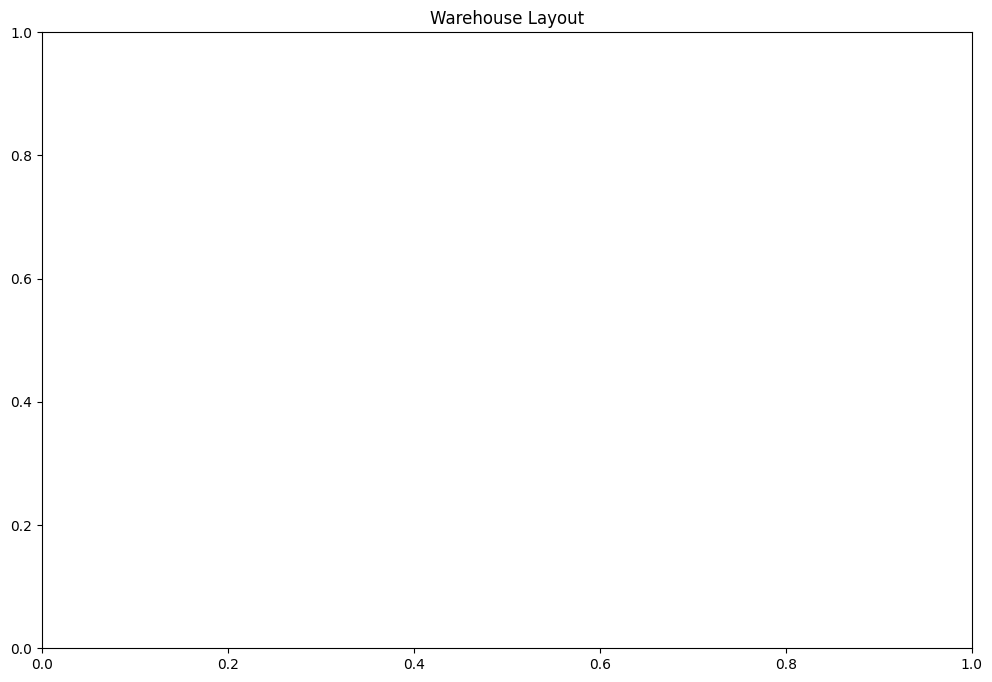

In [ ]:
import matplotlib.pyplot as plt

def plot_warehouse(warehouse):
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.set_title('Warehouse Layout')

    for zone_name, zone_data in warehouse['zones'].items():
        for rack in zone_data['racks']:
            for slot in rack['slots']:
                slot_id = slot['slot_id']
                max_weight = slot['max_weight']
                dimensions = slot['dimensions']
                near_picking_zone = rack['near_picking_zone']
                near_packing_machine = rack['near_packing_machine']
                near_outbound_gate = rack['near_outbound_gate']

                # Plot slot as a rectangle
                rect = plt.Rectangle((slot_id[5:], int(rack['rack_id'][5:]) * 20), dimensions[0], dimensions[1], linewidth=1, edgecolor='black', facecolor='white')
                ax.add_patch(rect)

                # Annotate with slot details
                ax.annotate(f"Slot {slot_id}\nMax Weight: {max_weight} kg\nNear Picking: {near_picking_zone}\nNear Packing: {near_packing_machine}\nNear Outbound: {near_outbound_gate}",
                            (slot_id[5:], int(rack['rack_id'][5:]) * 20), color='black', weight='bold',
                            fontsize=8, ha='center', va='center')

    ax.set_xlabel('Slot Dimensions (cm)')
    ax.set_ylabel('Rack ID')
    ax.set_aspect('equal')
    ax.grid(True)
    plt.tight_layout()
    plt.show()

# Example usage
warehouse = generate_warehouse(5)  # Generate a warehouse with 5 zones
plot_warehouse(warehouse)


In [ ]:
pip install PyQt5

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 338.1/338.1 kB 38.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 MB 7.8 MB/s eta 0:00:00


In [ ]:
from PyQt5.QtWidgets import QApplication, QMainWindow, QGraphicsScene, QGraphicsView, QGraphicsRectItem
import sys

class WarehouseViewer(QMainWindow):
    def __init__(self, warehouse):
        super().__init__()
        self.setWindowTitle('Warehouse Viewer')
        self.setGeometry(100, 100, 800, 600)

        self.warehouse = warehouse

        self.scene = QGraphicsScene(self)
        self.view = QGraphicsView(self.scene, self)
        self.setCentralWidget(self.view)

        self.plot_warehouse()

    def plot_warehouse(self):
        for zone_name, zone_data in self.warehouse['zones'].items():
            for rack in zone_data['racks']:
                for slot in rack['slots']:
                    slot_id = slot['slot_id']
                    dimensions = slot['dimensions']

                    rect_item = QGraphicsRectItem(int(slot_id[5:]), int(rack['rack_id'][5:]) * 20, dimensions[0], dimensions[1])
                    self.scene.addItem(rect_item)

                    # Example: Add text annotations for slot details
                    text_item = self.scene.addText(f"Slot {slot_id}\nDimensions: {dimensions[0]} x {dimensions[1]}")
                    text_item.setPos(int(slot_id[5:]), int(rack['rack_id'][5:]) * 20)

if __name__ == '__main__':
    warehouse = generate_warehouse(5)  # Generate a warehouse with 5 zones

    app = QApplication(sys.argv)
    window = WarehouseViewer(warehouse)
    window.show()
    sys.exit(app.exec_())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ModuleNotFoundError: No module named 'PyQt5'